In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_network=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv')

In [ ]:
df_network

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,...,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,...,0,0,-,-,-,-,-,-,1,mitm


In [5]:
df_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [6]:

Obj_column=[i for i in df_network.columns if df_network[i].dtype=='object']
df_network[Obj_column].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   src_ip                461043 non-null  object
 1   dst_ip                461043 non-null  object
 2   proto                 461043 non-null  object
 3   service               461043 non-null  object
 4   conn_state            461043 non-null  object
 5   dns_query             461043 non-null  object
 6   dns_AA                461043 non-null  object
 7   dns_RD                461043 non-null  object
 8   dns_RA                461043 non-null  object
 9   dns_rejected          461043 non-null  object
 10  ssl_version           461043 non-null  object
 11  ssl_cipher            461043 non-null  object
 12  ssl_resumed           461043 non-null  object
 13  ssl_established       461043 non-null  object
 14  ssl_subject           461043 non-null  object
 15  ssl_issuer       

In [7]:
for i in Obj_column:
  print('-----'*50)
  print(df_network[i].value_counts())

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
192.168.1.190     77033
192.168.1.152     67784
192.168.1.30      61637
192.168.1.79      41098
192.168.1.195     36089
                  ...  
255.42.60.52          1
243.111.49.216        1
10.3.191.169          1
74.166.95.98          1
118.164.23.26         1
Name: src_ip, Length: 11536, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
192.168.1.190    80102
192.168.1.152    60862
192.168.1.255    24295
192.168.1.195    23177
192.168.1.193    22902
                 ...  
200.62.191.10        1
192.195.66.12        1
85.90.64

In [9]:
All_NW=df_network
for i in Obj_column[:-1]:
  All_NW[i]=LabelEncoder().fit_transform(All_NW[i])

In [11]:
labels=list(All_NW.type.value_counts().index)
All_NW['type']=LabelEncoder().fit_transform(All_NW['type'])
num=list(All_NW.type.value_counts().index)

In [14]:
All_NW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  int64  
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  int64  
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  int64  
 6   service                 461043 non-null  int64  
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  int64  
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

In [15]:
All_NW.drop(['src_ip','dst_ip'],axis=1,inplace=True)

In [16]:
X=All_NW.iloc[:,:-1]
y=All_NW.iloc[:,-1]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

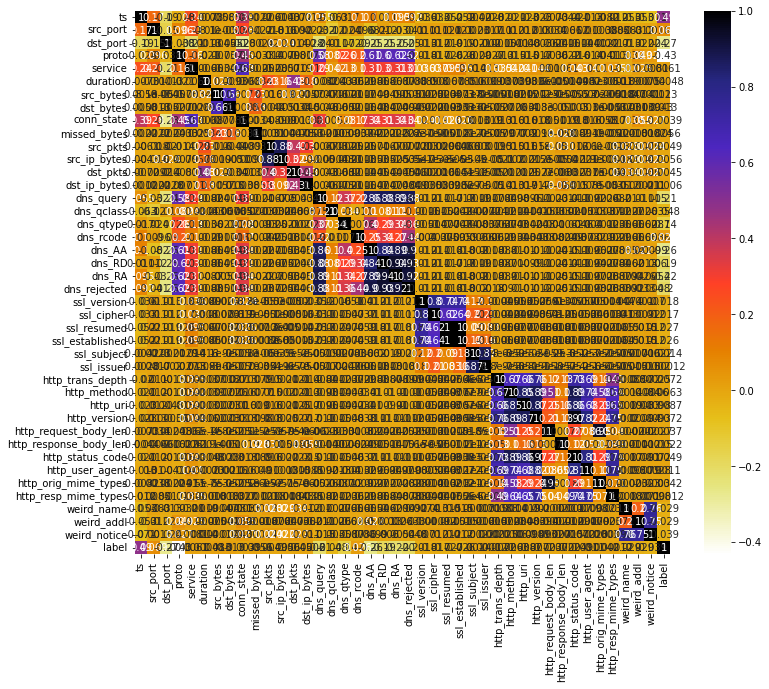

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [20]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.59446e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.45608e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.54283e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.7068e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.84121626 0.84181273 0.84209741 0.84288367 0.841309  ]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.17034e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.8418638179917961

In [21]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.38008e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.49      0.99      0.66      4069
           1       0.81      0.25      0.38      4057
           2       0.77      0.94      0.85      3989
           3       0.47      0.84      0.60      4093
           4       0.00      0.00      0.00       202
           5       1.00      1.00      1.00     59788
           6       0.22      0.02      0.04      4076
           7       0.00      0.00      0.00      4051
           8       0.72      0.67      0.70      3980
           9       0.39      0.67      0.50      3904

    accuracy                           0.84     92209
   macro avg       0.49      0.54      0.47     92209
weighted avg       0.82      0.84      0.81     92209

0.8393540760663276


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [23]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8174721015470714, 0.8393540760663276, 0.8101236794604101, None)

In [24]:
val=dict(zip(num,labels))

In [25]:
maping=set(y_train)
lebl=[val[i] for i in maping]

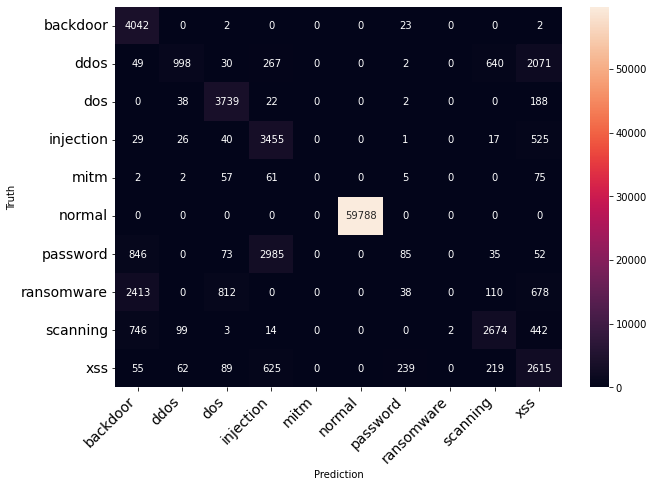

In [26]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [27]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8393540760663276
specificity_score:
0.9926801073046855
